#### Importing necessary packages ####

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
import sklearn;
import regex as re;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LinearRegression;
from sklearn.pipeline import Pipeline;


In [3]:
# Verifying mission values
df = pd.read_csv("used_cars.csv");
print(df.isnull().sum())

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [4]:
df.duplicated().sum()
#there is no duplicates in this data frame

0

To solve this problem of null values, we have three different approaches
<ul>
<li>Dropping all of these rows</li>
<li>Replacing it with mode or median or mean</li>
<li>Create another category for the NaN</li>
<li>Using KNNs</li>
</ul>

In [5]:
# replacing Null values with mode
df['fuel_type'] = df['fuel_type'].replace(np.nan,df['fuel_type'].mode()[0])

df['accident'] = df['accident'].replace(np.nan,df['accident'].mode()[0])

df = df.dropna(subset = ['clean_title'])

df = df.reset_index(drop=True);


In [6]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [7]:
# turning milage,price values into numbers
# df = df.drop(columns = ['engine','model'])
for i,row in df.iterrows():
    number = int("".join(re.findall("\d+",row['milage'])))
    df.loc[i,'milage'] = number;
    number = int("".join(re.findall("\d+",row['price'])))
    df.loc[i,'price'] = number;
    
df['milage'] = df['milage'].astype(int);
df['price'] = df['price'].astype(int);

df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
3,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
4,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300
...,...,...,...,...,...,...,...,...,...,...,...,...
3408,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900
3409,Bentley,Continental GT Speed,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950
3410,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900
3411,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999


Extracting new features (Horsepower, engine's displacement, engine configuration) from the engine column.

In [8]:

df.iloc[10:30]

def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')

df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean());
df['Engine_Displacement'] = df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean());


In [9]:
df = df.drop(columns=['engine'])
df

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,300.000000,3.7
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,331.445122,3.8
2,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500,354.000000,3.5
3,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,31000,292.000000,2.0
4,BMW,740 iL,2001,242000,Gasoline,A/T,Green,Green,None reported,Yes,7300,282.000000,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900,241.000000,2.0
3409,Bentley,Continental GT Speed,2023,714,Gasoline,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950,331.445122,6.0
3410,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900,349.000000,3.0
3411,Ford,F-150 Raptor,2020,33000,Gasoline,A/T,Blue,Black,None reported,Yes,62999,450.000000,3.5


In [10]:
print(df.isnull().sum())


brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
Horsepower             0
Engine_Displacement    0
dtype: int64


In [11]:
from sklearn.preprocessing import OneHotEncoder

X_cat = df.select_dtypes(include='object');

X_num = df.select_dtypes(exclude='object');

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False);
X_encoded = encoder.fit_transform(X_cat)

categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat.columns) for cat in encoder.categories_[i]]

one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)

df = X_num.join(one_hot_features);



In [12]:
from scipy import stats;
coef,p = stats.pearsonr(df['Horsepower'],df['price']);
print(coef , p);

0.2863662122201041 1.9989457111022824e-65


for better performance we will get rid of unrelated features

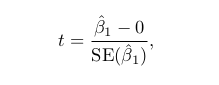

In [13]:
unrelated = [];
for col in df.columns:
    if not col=='price':
        print(col) 
        coef,p = stats.pearsonr(df[col],df['price']);
        print(coef,p)
        if p >= 0.001:
            unrelated.append(col);
            # df.drop(columns=col,inplace=True);

model_year
0.1879809178627789 1.624436954596424e-28
milage
-0.28796824545243516 3.5944490306749525e-66
Horsepower
0.2863662122201041 1.9989457111022824e-65
Engine_Displacement
0.16245883116168727 1.2841844119598811e-21
brand_Acura
-0.02775552043666018 0.10497036710028664
brand_Alfa
-0.004649940564092201 0.7859637354789973
brand_Aston
0.049838887820707514 0.003586913388403074
brand_Audi
-0.019703858625593356 0.24981166850494568
brand_BMW
-0.016582148038782753 0.3328169266038039
brand_Bentley
0.08891900363875314 1.9595653127641992e-07
brand_Bugatti
0.4012470495406764 3.222033057550881e-132
brand_Buick
-0.02407421511381884 0.159686838052779
brand_Cadillac
-0.005217364701982441 0.7605996054595981
brand_Chevrolet
-0.01992200377018766 0.24460631959598916
brand_Chrysler
-0.030906239222407345 0.07102153339557249
brand_Dodge
-0.017499614349616055 0.30675877440074933
brand_FIAT
-0.012664847302147206 0.4595122472924608
brand_Ferrari
0.12141629235373062 1.1030709376335957e-12
brand_Ford
-0.0314302

/tmp/ipykernel_39447/491772780.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coef,p = stats.pearsonr(df[col],df['price']);


In [14]:
df['price']

0        10300
1        38005
2        15500
3        31000
4         7300
         ...  
3408     25900
3409    349950
3410     53900
3411     62999
3412     40000
Name: price, Length: 3413, dtype: int64

In [15]:
import seaborn as sns
# fig,axes = plt.subplots(1,3 , figsize = (15,5))
# df_2 = df;
# df_2['price'] = np.log2(df['price']) ;
# for i in range(3):
#     sns.boxplot(x = unrelated[i] , y = 'price' , data = df_2 , width=0.5 , ax=axes[i]);
# # plt.ylim(0, 10000)  

# # coef,p = stats.pearsonr(df['int_col_Yellow'],df['price'])
# # print(coef , p);
# plt.show()


In [16]:

df = df.drop(columns=unrelated);

In [17]:
# print(df.dtypes);

train_x,test_x,train_y,test_y = train_test_split(df[df.columns.drop('price')], df['price'], test_size=0.2, random_state=40);


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
import statsmodels.api as sm
X = sm.add_constant(train_x)  # Adds a constant term to the predictor
model = sm.OLS(train_y, X).fit()
print(model.summary())

X = sm.add_constant(test_x) 
y_pred_statsmodels = model.predict(X)
r2_score(test_y, y_pred_statsmodels)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:20:14   Log-Likelihood:                -33409.
No. Observations:                2730   AIC:                         6.692e+04
Df Residuals:                    2679   BIC:                         6.722e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

0.5976949089462857

As you can see that some p-values are >= 0.001, so we can remove them (there is no evidence that these predictors are directly related to response).


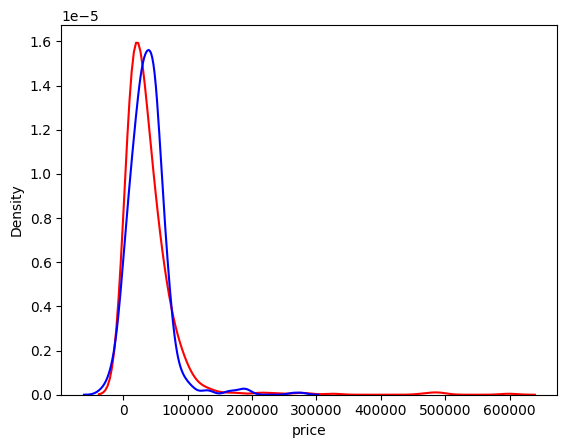

In [20]:
# Plot fitted values
ax1 = sns.kdeplot(test_y, color="r", label="Actual Value");
sns.kdeplot(y_pred_statsmodels, color="b", label="Fitted Values", ax=ax1);

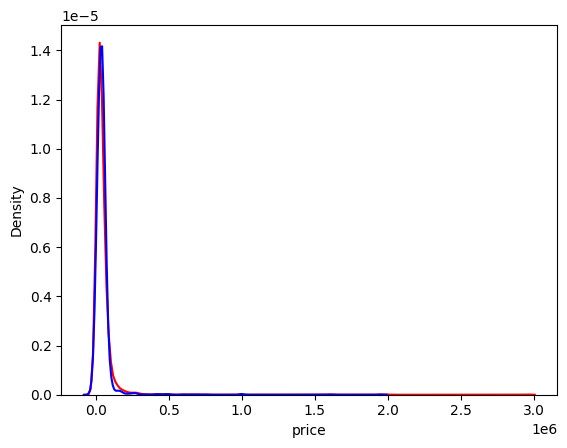

In [21]:
X = sm.add_constant(train_x);
y_pred_statsmodels = model.predict(X);

ax1 = sns.kdeplot(train_y, color="r", label="Actual Value");
sns.kdeplot(y_pred_statsmodels, color="b", label="Fitted Values", ax=ax1);

# r2_score(test_y, y_pred_statsmodels)

In [57]:
from sklearn import set_config
set_config(display="diagram")

input = [
    # ('scale',StandardScaler()),
    ('polynomial',PolynomialFeatures(degree=1)),
    ('Model',LinearRegression())
]
pipe = Pipeline(input);

In [58]:
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('Model', LinearRegression())])

In [59]:
pipe.fit(train_x,train_y)


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('Model', LinearRegression())])

0.675349423125887

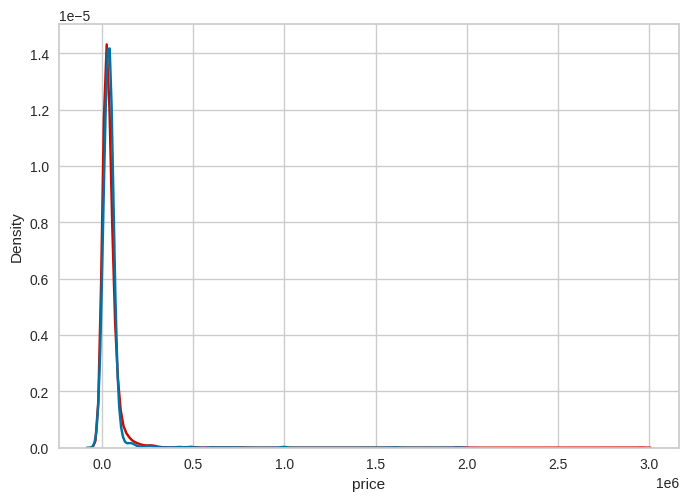

In [60]:
ax1 = sns.kdeplot(train_y, color="r", label="Actual Value");
sns.kdeplot(pipe.predict(train_x), color="b", label="Fitted Values", ax=ax1);
r2_score(train_y, pipe.predict(train_x))


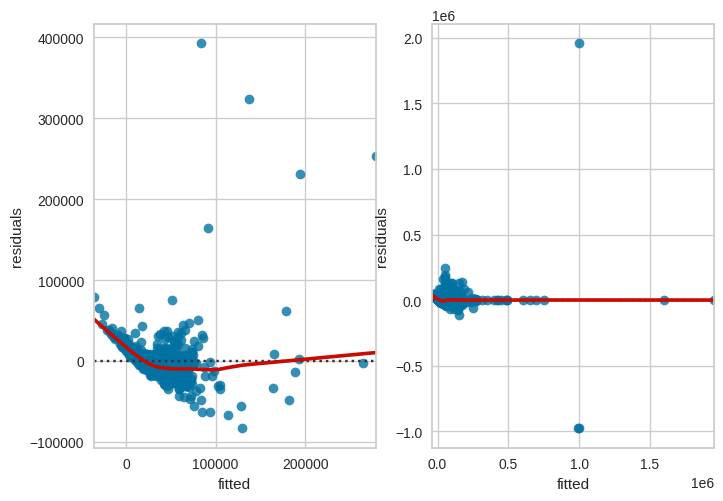

In [61]:
fig,axes = plt.subplots(1,2);
result_df_test = pd.DataFrame({'residuals' : test_y -  pipe.predict(test_x) , 'fitted' : pipe.predict(test_x)})
result_df_train = pd.DataFrame({'residuals' : train_y -  pipe.predict(train_x) , 'fitted' : pipe.predict(train_x)})
sns.residplot(data=result_df_test, y="residuals",x ="fitted", lowess=True, line_kws=dict(color="r") , ax= axes[0])
sns.residplot(data=result_df_train, y="residuals",x ="fitted", lowess=True, line_kws=dict(color="r") , ax= axes[1])
plt.show()

We can observe a pattern or a structure in our "test" residual scatter plot, so we conclude that there is some type of Non-Linearity.